# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [41]:
import pandas as pd
%matplotlib inline

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the "correct" name

In [42]:
df = pd.read_csv("animals.csv")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [43]:
df.shape

(6, 3)

In [44]:
df.dtypes

animal    object
name      object
length     int64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but not the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [45]:
df[:3]

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [46]:
df.sort_values('length', ascending=False)[:3]

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [47]:
print('mean:', df['length'].mean(), 
      'standard deviation:', df['length'].std())

mean: 43.6666666667 standard deviation: 12.5166555703


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [48]:
df['animal'].value_counts()

cat    3
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [49]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [50]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [51]:
df['inches'] = df['length'] * 0.393701

## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [52]:
cats = df[df['animal'] == 'cat']
dogs = df[df['animal'] == 'dog']

## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [53]:
cats[cats['inches'] > 12]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


In [54]:
df[(df['animal'] == 'cat') & (df['inches'] > 12)]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [55]:
print('Mean lenght of a cat:', cats['length'].mean())
print('Mean lenght of a dog:', dogs['length'].mean())

Mean lenght of a cat: 37.3333333333
Mean lenght of a dog: 50.0


## 13) If you didn't already, use `groupby` to do #12 all at once

In [56]:
df.groupby('animal')['length'].mean()

animal
cat    37.333333
dog    50.000000
Name: length, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1126042b0>]], dtype=object)

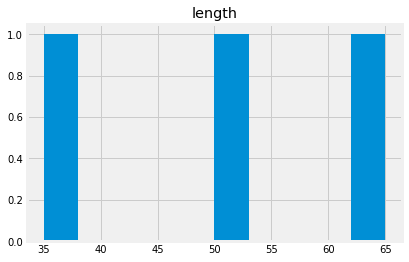

In [57]:
dogs.hist('length')

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** You can set a custom size for your plot by sending it something like `figsize=(2,15)`

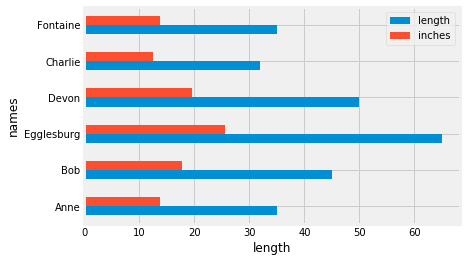

In [58]:
g = df.plot(kind='barh')
g.set_yticklabels(df.name)
g.set_xlabel("length")
g.set_ylabel("names")

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

In [59]:
cats.sort_values('length', ascending=False)

,animal,name,length,inches
1,cat,Bob,45,17.716545
0,cat,Anne,35,13.779535
4,cat,Charlie,32,12.598432


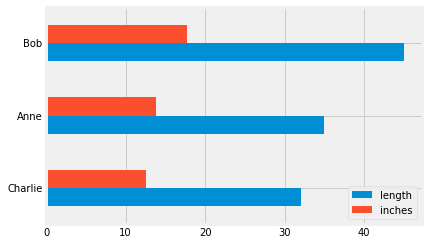

In [60]:
(cats
 .sort_values('length', ascending=True)
 .plot(kind='barh')
 .set_yticklabels(cats.sort_values('length', ascending=True).name))

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

In [61]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

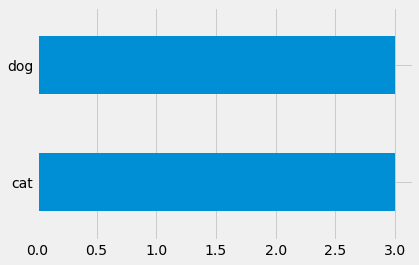

In [65]:
df['animal'].value_counts().plot(kind='barh')